In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxopt
from scipy import io

In [2]:
class SVM:
    def __init__(self):
        pass
    
    def Train(self, X, y, C):
        y = y.astype('double')
        y[y == 0.] = -1
        m, n = X.shape
        
        K = np.matmul(X,X.T) 
        I = np.eye(m)
        h1 = np.ones((m,1))*C
        h2 = np.zeros((m,1))
        
        P = cvxopt.matrix(np.outer(y,y)*K)
        q = cvxopt.matrix(np.ones(m)*(-1))
        G = cvxopt.matrix(np.vstack((I,-I)))
        h = cvxopt.matrix(np.vstack((h1,h2)))
        A = cvxopt.matrix(y.T)
        b = cvxopt.matrix(0.0)
        
        solution = cvxopt.solvers.qp(P,q,G,h,A,b)
        
        alphas = np.array(solution['x'])
        threshold = 1e-3
        sv_ids = np.where(alphas > threshold)[0]

        self.alphas = alphas[sv_ids]
        self.sv = X[sv_ids]
        self.sv_y = y[sv_ids]

        K_sv = np.matmul(self.sv, self.sv.T)
        self.b = np.sum(self.sv_y) -\
                np.sum(np.matmul(K_sv, self.alphas*self.sv_y))
        self.b /= len(self.alphas)
        self.w = np.sum(self.alphas*self.sv_y*self.sv, axis=0)
        
    def Predict(self, X):
        return np.sign(np.matmul(self.w, X.T) + self.b)

In [3]:
data1 = io.loadmat('data/data1.mat')
X = data1['X']
y = data1['y'].astype(int)

In [5]:
model = SVM()
model.Train(X, y, 1)

     pcost       dcost       gap    pres   dres
 0: -1.1833e+01 -9.1932e+01  4e+02  2e+00  1e-14
 1: -6.7902e+00 -4.9791e+01  6e+01  2e-01  1e-14
 2: -5.4665e+00 -1.0706e+01  6e+00  1e-02  9e-15
 3: -7.1271e+00 -8.4670e+00  1e+00  3e-03  7e-15
 4: -7.5827e+00 -7.8912e+00  3e-01  5e-04  1e-14
 5: -7.7167e+00 -7.7491e+00  3e-02  4e-05  1e-14
 6: -7.7309e+00 -7.7322e+00  1e-03  2e-06  1e-14
 7: -7.7315e+00 -7.7315e+00  1e-05  2e-08  1e-14
 8: -7.7315e+00 -7.7315e+00  1e-07  2e-10  1e-14
Optimal solution found.


In [6]:
def SupportLine(X, w, b, c):
    return -(w[0]*X + b + c)/w[1]

In [7]:
xs = np.arange(0,4,0.01)

hyperplane = SupportLine(xs, model.w, model.b, 0)
bot_support = SupportLine(xs, model.w, model.b, 1)
top_support = SupportLine(xs, model.w, model.b, -1)

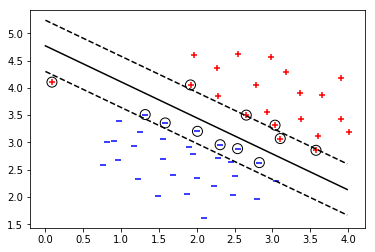

In [8]:
plt.scatter(X[np.where(y==1)[0],0], X[np.where(y==1)[0],1],
            marker='+', c='r')
plt.scatter(model.sv[:,0], model.sv[:,1], 
            marker='o', facecolors='none', edgecolors='k', s=100)
plt.scatter(X[np.where(y==0)[0],0],X[np.where(y==0)[0],1],
            marker='_', c='b')
plt.plot(xs, hyperplane, 'k')
plt.plot(xs, bot_support, 'k--')
plt.plot(xs, top_support, 'k--')
plt.show()